## Markov discrete graphical model

In [1]:
import random
import matplotlib.pyplot as plt
import random
import networkx as nx
from itertools import combinations
import numpy as np

### Graph classes

In [2]:
class Node:
    def __init__(self, state):
        self.state = state
        self.timeInState = 0
    def changeState(self, newState):
        self.state = newState
        self.timeInState = 0
    def update_step(self, incubation):
        self.timeInState += 1
        if self.state == 'I' and self.timeInState >= incubation:
            self.changeState('R')
class Graph:
    def __init__(self, edges, nodes, weights):
        self.edges = edges
        self.nodes = nodes
        self.weights = weights
    def findNeighbors(self, node):
        neighbors = []
        for ndash in self.nodes:
            if ((node, ndash) in self.edges) or ((ndash,node) in self.edges):
                neighbors.append(ndash)
        return neighbors
    def countState(self, state):
        cnt = 0
        for node in self.nodes:
            if node.state == state:
                cnt+=1
        return cnt
    def nodesOfState(self, state):
        return [x for x in self.nodes if x.state == state]
    def update_nodes(self, incubation, draw, i=0):
        for node in self.nodes:
            node.update_step(incubation)
            if draw:
                g = nx.Graph()
                g.add_nodes_from(self.nodes)
                g.add_edges_from(self.edges)
                color_map = self.generate_color_map()
                plt.figure()
                seed = 31 
                np.random.seed(seed)
                nx.draw(g, node_color=color_map)
                plt.savefig(f'animation/{i}.png')
    def generate_color_map(self):
        color_map = []
        for node in self.nodes:
            if node.state == 'S':
                color_map.append('green')
            elif node.state == 'I': 
                color_map.append('red') 
            elif node.state == 'R':
                color_map.append('grey')
        return color_map
            
        

### Simulation loop

In [3]:
def simulation(G, time_period, phi=0.2, incubation = 4, edges = None, draw = False):
    T = time_period
    I=[G.countState('I')]
    S=[G.countState('S')]
    R=[G.countState('R')]
    for i in range(0, T): #time loop
        for node in G.nodes: #node loop
            if node.state == 'I':
                neighbors = G.findNeighbors(node)
                for neighbor in neighbors:
                    if neighbor.state == 'S' and random.random()<=phi:
                        neighbor.changeState('I')
        G.update_nodes(incubation, draw, i)
        I.append(G.countState('I'))
        S.append(G.countState('S'))
        R.append(G.countState('R'))
    plt.title(f'DelayCGEM, phi={phi}, r={edges}, τ={incubation}')
    plt.plot(S, label = 'S')
    plt.plot(I, label = 'I')
    plt.plot(R, label = 'R')
    plt.legend()
    #return S,I,R
                    

In [4]:
def drawGraph(G):
    pass

### Trial network

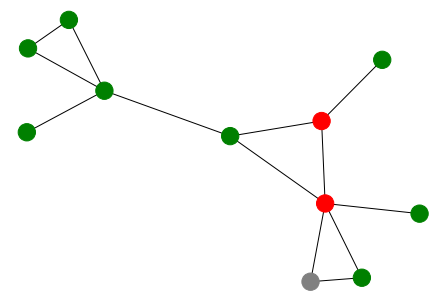

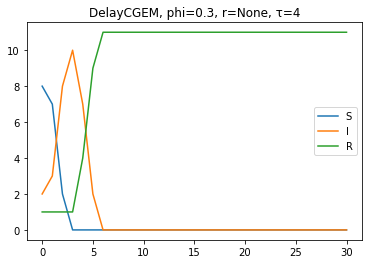

In [5]:
nodes = [Node('S'), Node('S'), Node('S'), Node('I'), Node('I'),
        Node('S'), Node('R'), Node('S'), Node('S'), Node('S'), Node('S')]
edges = [(nodes[0], nodes[4]), (nodes[1], nodes[3]),
        (nodes[3], nodes[4]),(nodes[3], nodes[2]),
        (nodes[2], nodes[6]),(nodes[6], nodes[3]),
        (nodes[3], nodes[5]),(nodes[4], nodes[5]),
        (nodes[5], nodes[8]),(nodes[8], nodes[7]),
        (nodes[8], nodes[10]),(nodes[10], nodes[9]),
        (nodes[8], nodes[9])]
weights = [1]*len(edges)
G = Graph(edges, nodes, weights)
plt.figure()
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
color_map = G.generate_color_map()
nx.draw(g, node_color=color_map)
plt.figure()
simulation(G=G, phi = 0.3, time_period=30, incubation = 4, draw = False)

### ER graph generation

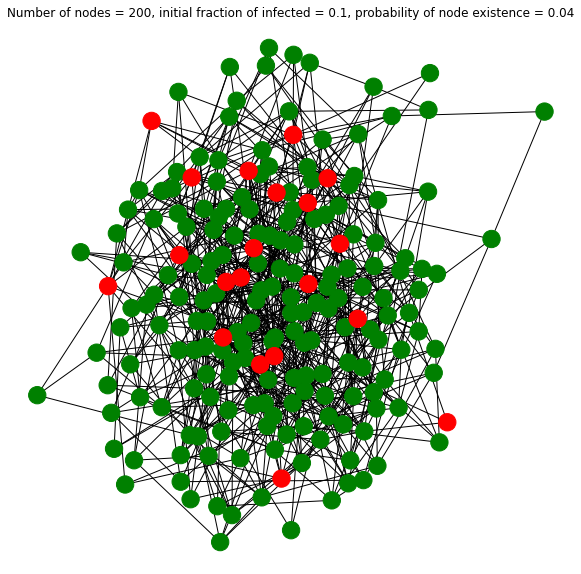

In [8]:
# probability for an edge to exist
p = 0.04

numNodes = 200
i_frac = 0.1
r_frac = 0
s_frac = 1-i_frac-r_frac
nodes = [Node(state) for state,frac in zip(['S','I','R'], [s_frac, i_frac, r_frac]) for i in range(int(numNodes*frac))]
# ASSUMPTION: This array contains all desired nodes
#nodes = [Node('S'), Node('S'), Node('S'), Node('I'), Node('I'),
#        Node('S'), Node('R'), Node('S'), Node('S'), Node('S'), Node('S')]

g = nx.Graph()
g.add_nodes_from(nodes)

i=0
for u, v in combinations(g, 2):
    if random.random() < p:
        g.add_edge(u, v)
    i+=1
G = Graph(g.edges, nodes, weights)
plt.figure(figsize = (10,10))
color_map = G.generate_color_map()
plt.title(f'Number of nodes = {numNodes}, initial fraction of infected = {i_frac}, probability of node existence = {p}')
nx.draw(g, node_color=color_map)